# Instalando Bibliotecas

In [ ]:
import cv2
import numpy as np
import os
import glob
import pandas as pd
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow # for image display

### biblioteca para extração de descritores de haralick

In [ ]:
!pip install mahotas==1.4.11
import mahotas as mt

     |████████████████████████████████| 5.7 MB 2.5 MB/s 


# Dataset

In [ ]:
!gdown --id 1ZIcOVraxDcCN7jV-LLmidbaSnOSA0BJV

Downloading...
From: https://drive.google.com/uc?id=1ZIcOVraxDcCN7jV-LLmidbaSnOSA0BJV
To: /content/dataset_covid_atividade.zip
100% 38.2M/38.2M [00:00<00:00, 92.0MB/s]


In [ ]:
!unzip dataset_covid_atividade.zip

Archive:  dataset_covid_atividade.zip
   creating: dataset_covid_atividade/
   creating: dataset_covid_atividade/covid/
  inflating: dataset_covid_atividade/covid/COVID-1.png  
  inflating: dataset_covid_atividade/covid/COVID-10.png  
  inflating: dataset_covid_atividade/covid/COVID-100.png  
  inflating: dataset_covid_atividade/covid/COVID-101.png  
  inflating: dataset_covid_atividade/covid/COVID-102.png  
  inflating: dataset_covid_atividade/covid/COVID-103.png  
  inflating: dataset_covid_atividade/covid/COVID-104.png  
  inflating: dataset_covid_atividade/covid/COVID-105.png  
  inflating: dataset_covid_atividade/covid/COVID-106.png  
  inflating: dataset_covid_atividade/covid/COVID-107.png  
  inflating: dataset_covid_atividade/covid/COVID-108.png  
  inflating: dataset_covid_atividade/covid/COVID-109.png  
  inflating: dataset_covid_atividade/covid/COVID-11.png  
  inflating: dataset_covid_atividade/covid/COVID-110.png  
  inflating: dataset_covid_atividade/covid/COVID-111.png  

# Gerando o dataset

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = 'dataset_covid_atividade/covid'
covid_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
covid_files

['COVID-354.png',
 'COVID-316.png',
 'COVID-472.png',
 'COVID-276.png',
 'COVID-369.png',
 'COVID-102.png',
 'COVID-157.png',
 'COVID-428.png',
 'COVID-118.png',
 'COVID-465.png',
 'COVID-448.png',
 'COVID-1.png',
 'COVID-492.png',
 'COVID-375.png',
 'COVID-174.png',
 'COVID-155.png',
 'COVID-488.png',
 'COVID-108.png',
 'COVID-58.png',
 'COVID-390.png',
 'COVID-331.png',
 'COVID-300.png',
 'COVID-25.png',
 'COVID-209.png',
 'COVID-135.png',
 'COVID-187.png',
 'COVID-171.png',
 'COVID-456.png',
 'COVID-215.png',
 'COVID-336.png',
 'COVID-38.png',
 'COVID-98.png',
 'COVID-284.png',
 'COVID-68.png',
 'COVID-128.png',
 'COVID-308.png',
 'COVID-464.png',
 'COVID-319.png',
 'COVID-379.png',
 'COVID-112.png',
 'COVID-348.png',
 'COVID-312.png',
 'COVID-77.png',
 'COVID-225.png',
 'COVID-170.png',
 'COVID-236.png',
 'COVID-194.png',
 'COVID-178.png',
 'COVID-152.png',
 'COVID-133.png',
 'COVID-169.png',
 'COVID-61.png',
 'COVID-277.png',
 'COVID-32.png',
 'COVID-122.png',
 'COVID-24.png',
 'C

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = 'dataset_covid_atividade/non-covid'
non_covid_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
non_covid_files

['Normal-156.png',
 'Normal-357.png',
 'Normal-213.png',
 'Normal-205.png',
 'Normal-356.png',
 'Normal-336.png',
 'Normal-398.png',
 'Normal-237.png',
 'Normal-87.png',
 'Normal-1.png',
 'Normal-461.png',
 'Normal-147.png',
 'Normal-180.png',
 'Normal-281.png',
 'Normal-61.png',
 'Normal-376.png',
 'Normal-45.png',
 'Normal-440.png',
 'Normal-495.png',
 'Normal-413.png',
 'Normal-454.png',
 'Normal-369.png',
 'Normal-284.png',
 'Normal-86.png',
 'Normal-135.png',
 'Normal-124.png',
 'Normal-277.png',
 'Normal-251.png',
 'Normal-188.png',
 'Normal-303.png',
 'Normal-52.png',
 'Normal-139.png',
 'Normal-129.png',
 'Normal-162.png',
 'Normal-170.png',
 'Normal-337.png',
 'Normal-119.png',
 'Normal-346.png',
 'Normal-338.png',
 'Normal-157.png',
 'Normal-316.png',
 'Normal-305.png',
 'Normal-151.png',
 'Normal-450.png',
 'Normal-331.png',
 'Normal-463.png',
 'Normal-70.png',
 'Normal-78.png',
 'Normal-92.png',
 'Normal-280.png',
 'Normal-7.png',
 'Normal-301.png',
 'Normal-77.png',
 'Norm

In [ ]:
dataset = []
for img_url in non_covid_files:
  try:
    image = io.imread('dataset_covid_atividade/non-covid/'+img_url) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dataset.append(image)
  except:
    print('Warning: ',img_url)

In [ ]:
for img_url in covid_files:
  try:
    image = io.imread('dataset_covid_atividade/covid/'+img_url) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dataset.append(image)
  except:
    print('Warning: ',img_url)

### Exemplo - Raio-X Covid

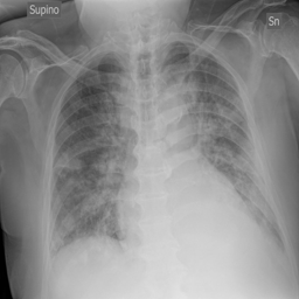

In [ ]:
img = cv2.imread('dataset_covid_atividade/covid/COVID-10.png')
cv2_imshow(img)

### Exemplo - Raio-X Non-Covid

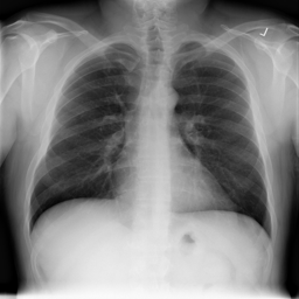

In [ ]:
img = cv2.imread('dataset_covid_atividade/non-covid/Normal-10.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# Pré-processando via Descritores de Texturas

In [ ]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)
        ht_mean = textures.mean(axis=0)
        return ht_mean


In [ ]:
from tqdm.notebook import tqdm
X = []
for image in tqdm(dataset):
  textures = extract_features(image)
  X.append(textures)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
Y = ['non_covid']*500 + ['covid']*500

In [ ]:
df_data = pd.DataFrame(X)
df_data['labels'] = Y

df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,labels
0,0.023924,84.875113,0.989575,4073.388092,0.380356,180.696823,16208.677255,7.945148,10.995989,0.000661,3.621739,-0.462164,0.998707,non_covid
1,0.011900,56.434114,0.990703,3038.317105,0.398866,187.336400,12096.834308,7.970847,10.836817,0.000738,3.374815,-0.480953,0.999009,non_covid
2,0.001600,91.387477,0.984822,3018.159399,0.300298,257.523520,11981.250120,8.472048,11.881810,0.000611,3.716656,-0.432159,0.998479,non_covid
3,0.002234,72.175308,0.988033,3022.739635,0.334038,264.066703,12018.783230,8.386497,11.561538,0.000674,3.513909,-0.457721,0.998940,non_covid
4,0.003084,56.906788,0.992272,3691.104898,0.360289,275.351392,14707.512803,8.434673,11.416424,0.000729,3.362094,-0.487979,0.999372,non_covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.001226,76.963130,0.989875,3812.869441,0.360123,287.440478,15174.514632,8.581880,11.514440,0.000746,3.387516,-0.499744,0.999526,covid
996,0.006474,47.746958,0.995751,5622.274341,0.541900,346.446549,22441.350408,8.063233,10.018017,0.001038,2.762778,-0.611263,0.999881,covid
997,0.001918,65.997882,0.992590,4461.066425,0.457632,280.066500,17778.267818,8.479133,10.811354,0.000924,2.931177,-0.575236,0.999855,covid
998,0.010502,31.964451,0.997599,6663.660637,0.506440,303.025054,26622.678098,8.217296,10.307509,0.000936,2.884594,-0.606788,0.999896,covid


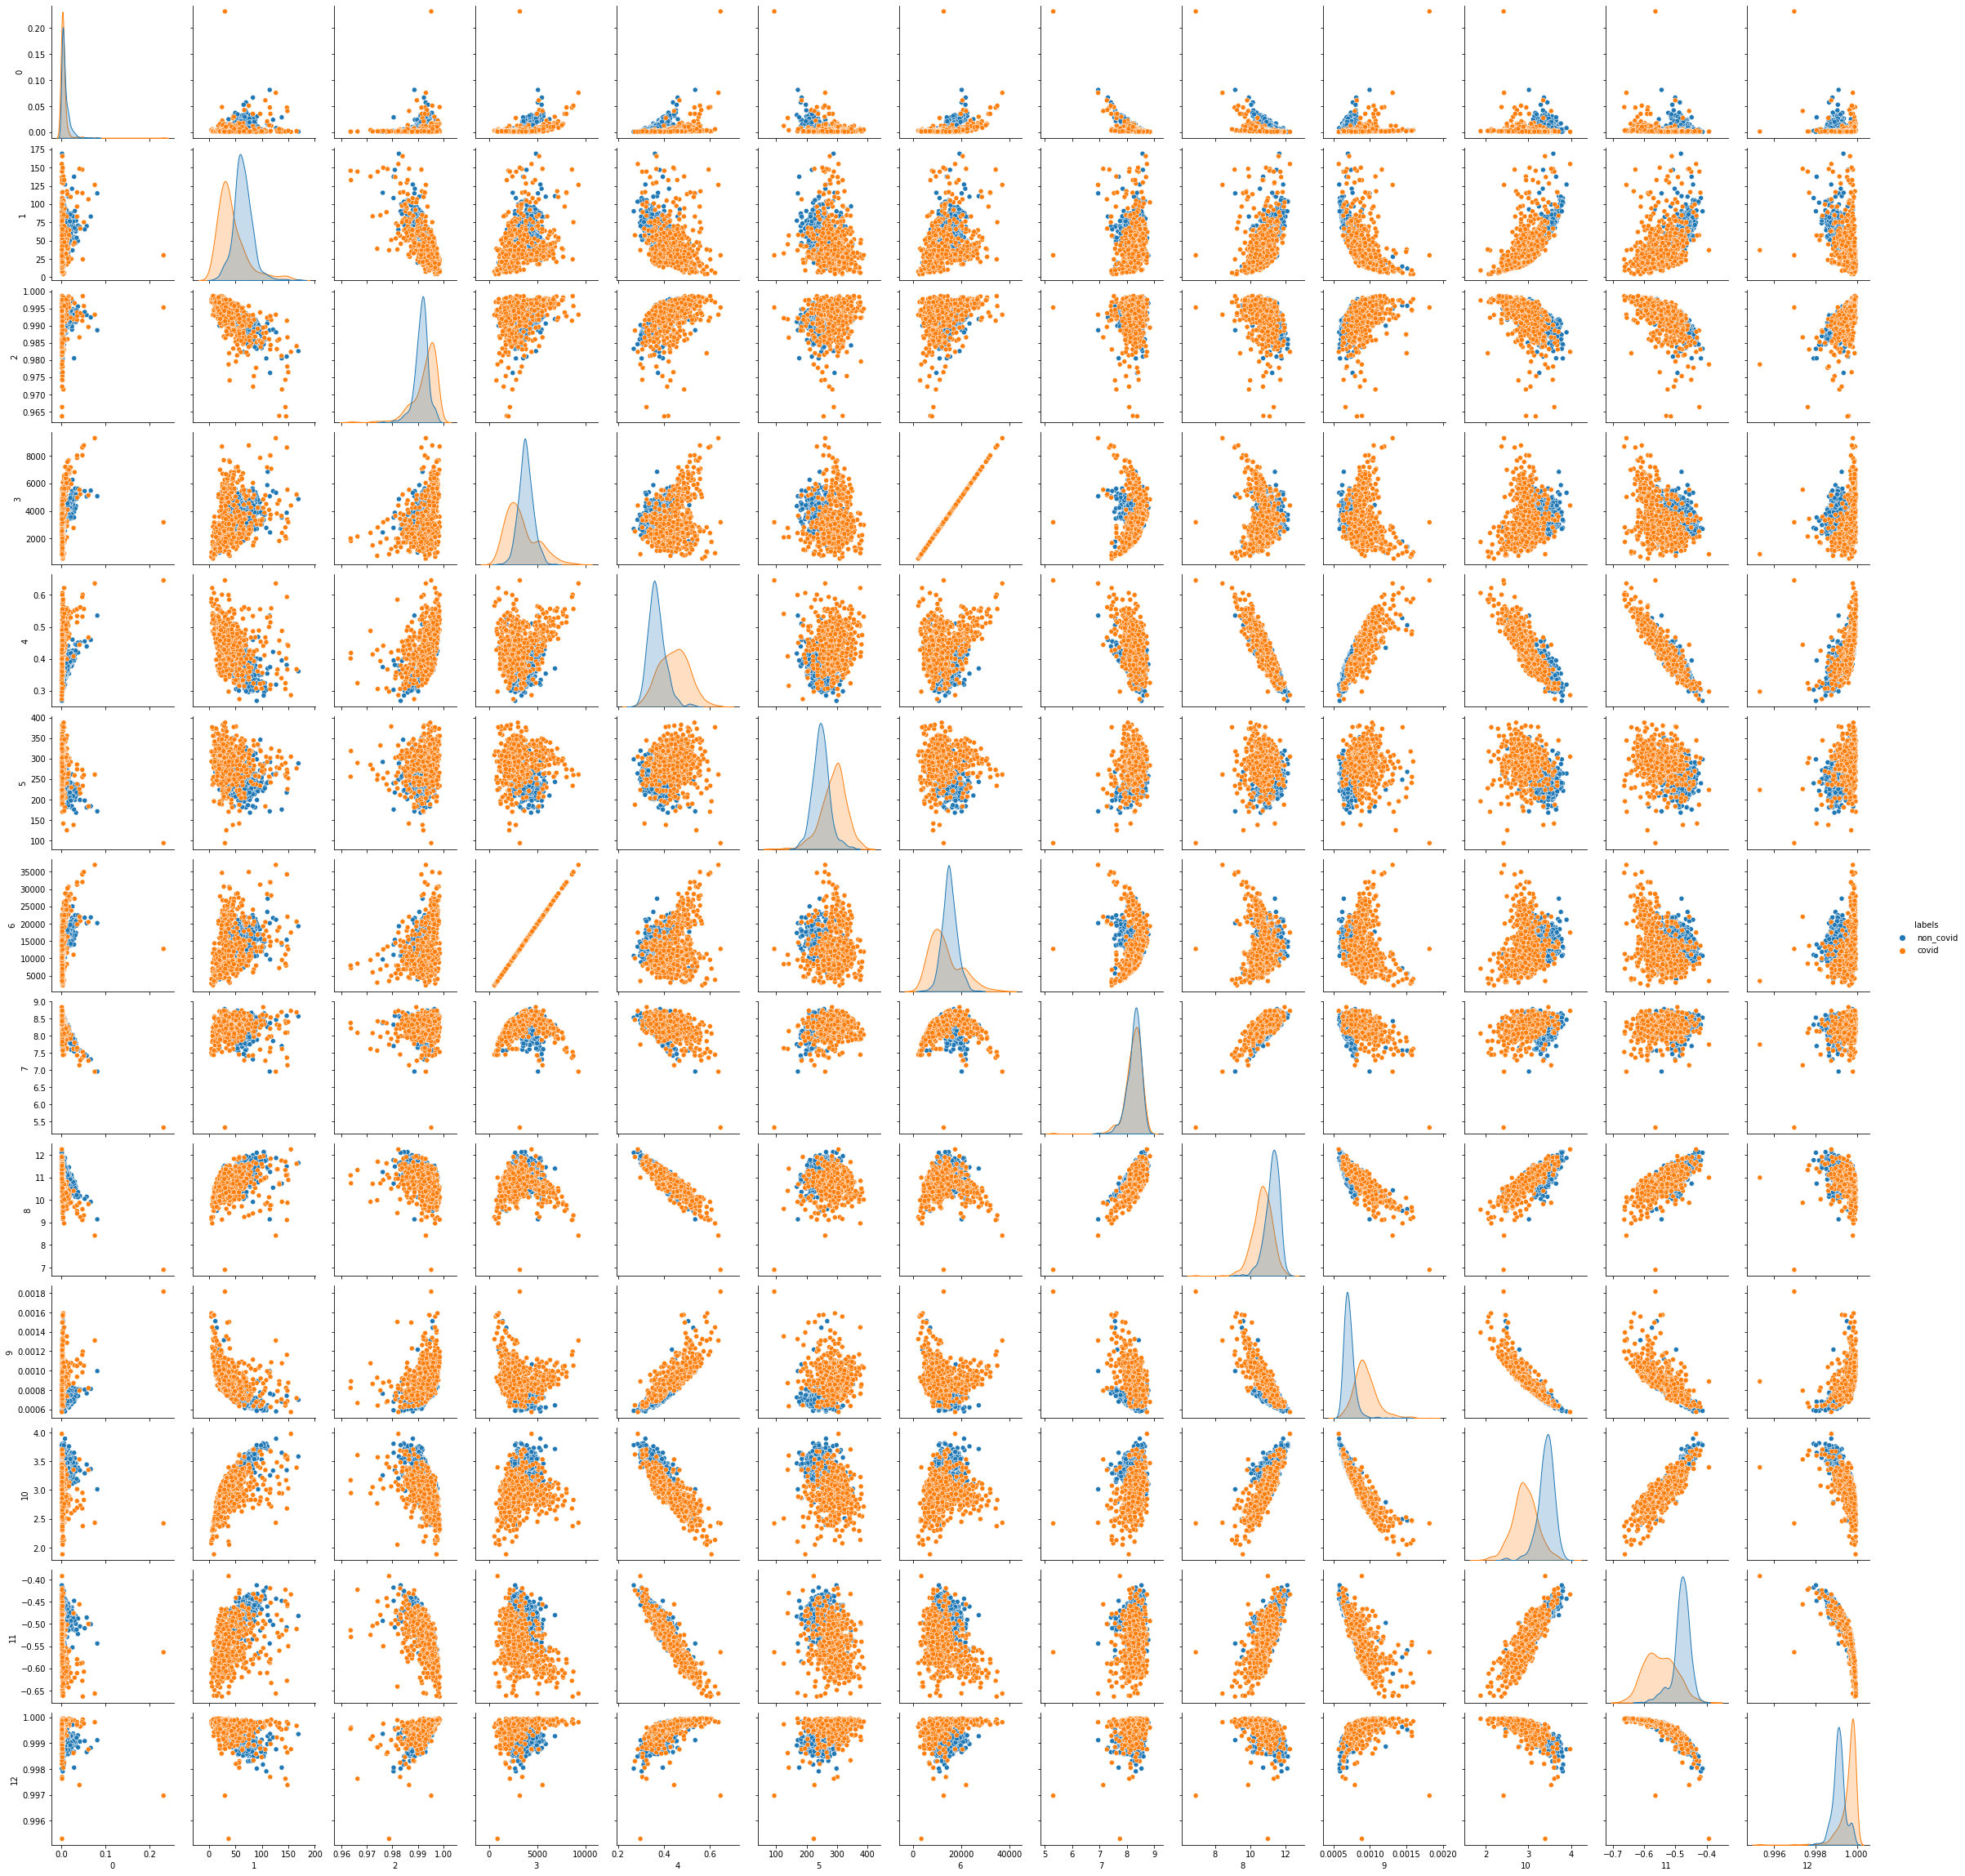

In [ ]:
import seaborn as sns


sns.pairplot(df_data, hue="labels")

# Atividade

* 1. Escolher dois descritores de textura de Haralick (cada coluna é um descritor).
* 2. Dividir o conjunto de dados com 80% de treinamento e 20% de teste.
* 3. Avaliar a classificação a partir dos dois descritores utilizados.

1 - Escolhi os descritores 5 e 10, devido a suas distribuições demonstrarem terem maior diferença entre os dois targets.


In [ ]:
dataset = df_data[[5,10,'labels']]

2 -

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

dataset[5] = mms.fit_transform(dataset[[5]])
dataset[10] = mms.fit_transform(dataset[[10]])

df_train, df_test = train_test_split(dataset, test_size=0.20, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3 -

In [ ]:
X_train = df_train[[5,10]] 
y_train = df_train[['labels']]

X_test = df_test[[5,10]] 
y_test = df_test[['labels']]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

print('Acurácia: ',neigh.score(X_test,y_test))

Acurácia:  0.89


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
neigh.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X_train, y_train)

print('Acurácia: ', model.score(X_test, y_test))

Acurácia:  0.91


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia do modelo de regressão logística foi muito bom, com valor de 91%

Refazer: utilizar outras métricas de
classificação a partir da função classification report 